# Imports

In [3]:
import numpy as np
import pandas as pd
from pyarrow import feather
import matplotlib.pyplot as plt
import librosa
from skimage.transform import resize

# Load and plot audio signal

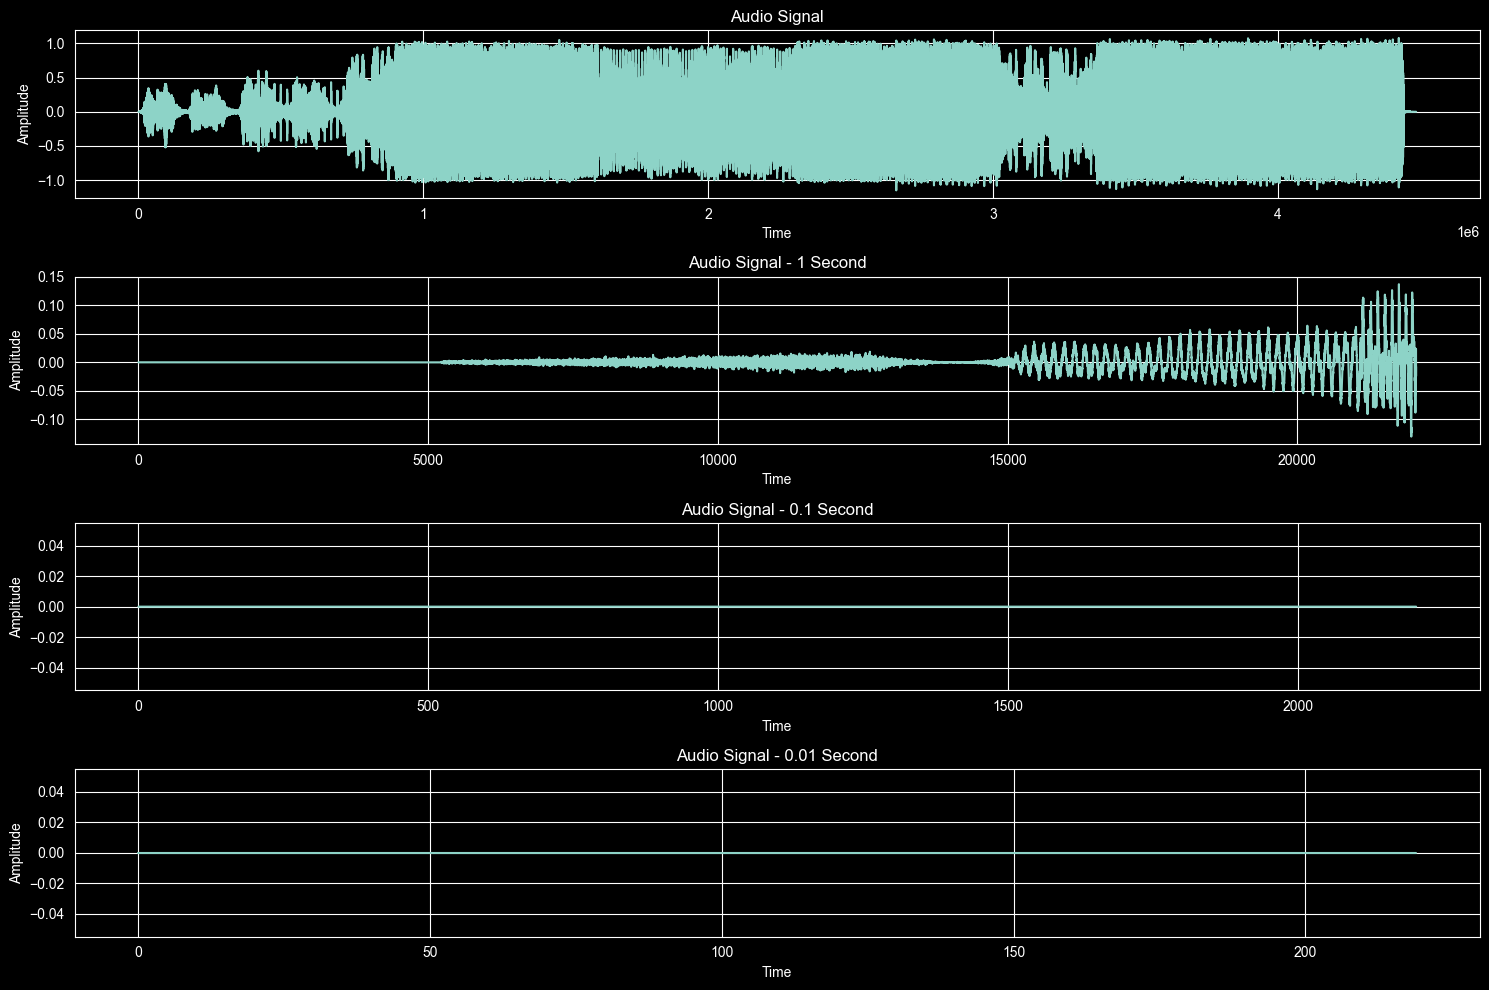

In [5]:
sound_sample_file = '../data/5sos.mp3'

# load sound file with librosa
signal, sample_rate = librosa.load(sound_sample_file)

# plot 30 sec sample
fig, ax = plt.subplots(nrows=4, figsize=(15, 10))
ax[0].plot(range(len(signal)), signal)
ax[0].set_title('Audio Signal')
ax[0].set_ylabel('Amplitude')
ax[0].set_xlabel('Time')

# plot 1 sec sample
signal_sample = signal[:sample_rate]
ax[1].plot(range(len(signal_sample)), signal_sample)
ax[1].set_title('Audio Signal - 1 Second')
ax[1].set_ylabel('Amplitude')
ax[1].set_xlabel('Time')

# plot 0.1 sec sample
signal_short = signal[500:500+sample_rate//10]
ax[2].plot(range(len(signal_short)), signal_short)
ax[2].set_title('Audio Signal - 0.1 Second')
ax[2].set_ylabel('Amplitude')
ax[2].set_xlabel('Time')

# plot 0.01 sec sample
signal_very_short = signal[500:500+sample_rate//100]
ax[3].plot(range(len(signal_very_short)), signal_very_short)
ax[3].set_title('Audio Signal - 0.01 Second')
ax[3].set_ylabel('Amplitude')
ax[3].set_xlabel('Time')

plt.tight_layout()
plt.show()

# Load Spectogram

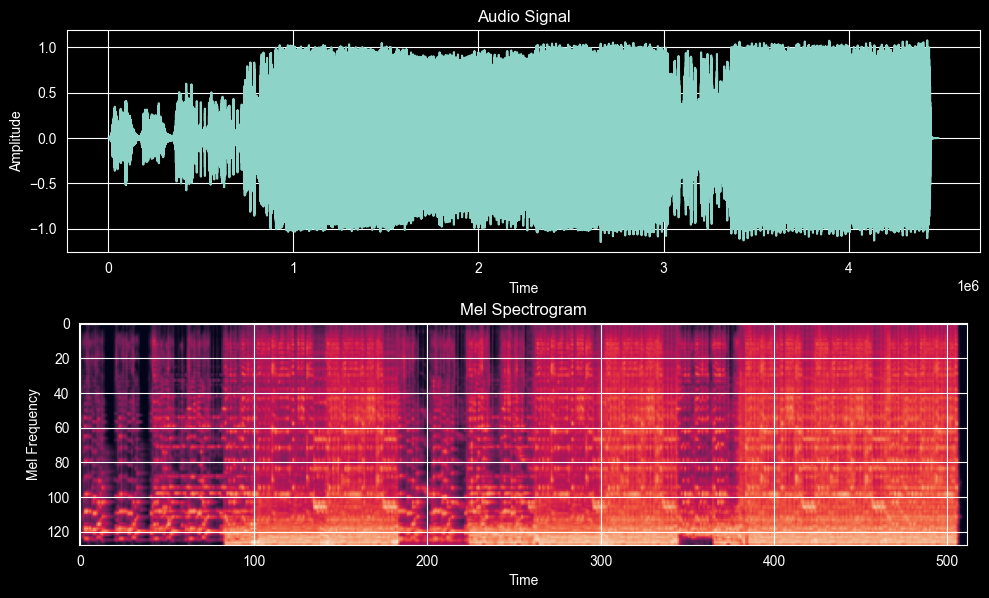

In [8]:
signal, sample_rate = librosa.load(sound_sample_file)

mels = librosa.power_to_db(librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=128, fmax=8000), ref=np.max)
mel_image = (((80+mels)/80)*255)
mel_image = np.flip(mel_image, axis=0)
mel_image = resize(mel_image, (128, 512)).astype(np.uint8)

fig,  ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(range(len(signal)), signal)
ax[0].set_title('Audio Signal')
ax[0].set_ylabel('Amplitude')
ax[0].set_xlabel('Time')

ax[1].imshow(mel_image)
ax[1].set_title('Mel Spectrogram')
ax[1].set_ylabel('Mel Frequency')
ax[1].set_xlabel('Time')

plt.tight_layout()
plt.show()
